In [1]:
# source code: https://github.com/tommyod/Efficient-Apriori
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori
import math
import itertools

In [2]:
MIN_SUPPORT = 0.2
MIN_CONFIDENCE = 0.05

In [3]:
# import all 4 datasets
data_1 = pd.read_csv('Data/data_1.csv', header=0)
data_2 = pd.read_csv('Data/data_2.csv', header=None)
data_3 = pd.read_csv('Data/data_3.csv', header=None)
data_4 = pd.read_csv('Data/data_4.csv', header=None)

In [4]:
data_1.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# preprocess data_1

# remove column 0
data_1 = data_1.drop(columns=['Unnamed: 0'])

In [6]:
# change all data to baskets of items instead of booleans
data_1.loc[:, :] = data_1.loc[:, :].mul(data_1.columns)
data_1.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,,Bread,,,Corn,Dill,,Ice cream,,,,,Sugar,,Yogurt,chocolate
1,,,,,,,,,,Milk,,,,,,
2,Apple,,Butter,,,Dill,,Ice cream,,Milk,,,,,Yogurt,chocolate
3,,,Butter,Cheese,,Dill,,,,Milk,Nutmeg,Onion,,,,
4,Apple,Bread,,,,,,,,,,,,,,


In [7]:
# convert to 2D list
data_1 = data_1.values.tolist()

In [8]:
# remove all empty strings and convert all values to string in 2d list
data_1 = [[str(elem) for elem in sub_list if elem != ''] for sub_list in data_1]

In [9]:
# convert 2D list to list of tuples 
data_1 = [tuple(sub_list) for sub_list in data_1]

In [10]:
for i in range(5):
    print(data_1[i])

('Bread', 'Corn', 'Dill', 'Ice cream', 'Sugar', 'Yogurt', 'chocolate')
('Milk',)
('Apple', 'Butter', 'Dill', 'Ice cream', 'Milk', 'Yogurt', 'chocolate')
('Butter', 'Cheese', 'Dill', 'Milk', 'Nutmeg', 'Onion')
('Apple', 'Bread')


In [11]:
%%time
# apply apriori algorithm on dataset 1 (MIN_SUPPORT=0.2, MIN_CONFIDENCE=0.05)
itemsets, rules = apriori(data_1[:3000], min_support=MIN_SUPPORT, min_confidence=MIN_CONFIDENCE)

Wall time: 3.02 ms


In [12]:
# print the itemsets and rules
print(itemsets)
print('')
for i in range(len(rules)):
    print(rules[i])

{1: {('Bread',): 384, ('Corn',): 407, ('Dill',): 398, ('Ice cream',): 410, ('Sugar',): 409, ('Yogurt',): 420, ('chocolate',): 421, ('Milk',): 405, ('Apple',): 383, ('Butter',): 420, ('Cheese',): 404, ('Nutmeg',): 401, ('Onion',): 403, ('Unicorn',): 389, ('Eggs',): 384, ('Kidney Beans',): 408}, 2: {('Butter', 'Ice cream'): 207, ('Butter', 'Kidney Beans'): 202, ('Butter', 'chocolate'): 202, ('Cheese', 'Kidney Beans'): 200, ('Ice cream', 'chocolate'): 202, ('Milk', 'chocolate'): 211}}

{Ice cream} -> {Butter} (conf: 0.505, supp: 0.207, lift: 1.201, conv: 1.171)
{Butter} -> {Ice cream} (conf: 0.493, supp: 0.207, lift: 1.201, conv: 1.163)
{Kidney Beans} -> {Butter} (conf: 0.495, supp: 0.202, lift: 1.178, conv: 1.148)
{Butter} -> {Kidney Beans} (conf: 0.481, supp: 0.202, lift: 1.178, conv: 1.140)
{chocolate} -> {Butter} (conf: 0.480, supp: 0.202, lift: 1.141, conv: 1.114)
{Butter} -> {chocolate} (conf: 0.481, supp: 0.202, lift: 1.141, conv: 1.115)
{Kidney Beans} -> {Cheese} (conf: 0.490, sup

In [13]:
# preprocess data_2
data_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# convert to list
data_2 = data_2.values.tolist()

In [15]:
# remove null values and convert values to string
data_2 = [[str(val) for val in sub_list if not isinstance(val, float) or not math.isnan(val)] for sub_list in data_2]

In [16]:
# convert list of list to list of tuples
data_2 = [tuple(sub_list) for sub_list in data_2]

In [17]:
for i in range(5):
    print(data_2[i])

('shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil')
('burgers', 'meatballs', 'eggs')
('chutney',)
('turkey', 'avocado')
('mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea')


In [18]:
%%time
# change the MIN_SUPPORT and MIN_CONFIDENCE values to generate useful association rules
MIN_SUPPORT, MIN_CONFIDENCE = 0.05, 0.005
# apply apriori algorithm on dataset 2
itemsets, rules = apriori(data_2[:3000], min_support=MIN_SUPPORT, min_confidence=MIN_CONFIDENCE)

Wall time: 5.01 ms


In [19]:
# print the itemsets and rules
print(itemsets)
print('')
for i in range(len(rules)):
    print(rules[i])

{1: {('shrimp',): 232, ('low fat yogurt',): 222, ('green tea',): 430, ('mineral water',): 715, ('frozen smoothie',): 196, ('olive oil',): 209, ('burgers',): 257, ('eggs',): 561, ('turkey',): 198, ('milk',): 397, ('whole wheat rice',): 158, ('french fries',): 520, ('soup',): 165, ('frozen vegetables',): 276, ('spaghetti',): 550, ('cookies',): 246, ('cooking oil',): 170, ('chocolate',): 529, ('chicken',): 192, ('tomatoes',): 206, ('pancakes',): 276, ('grated cheese',): 166, ('ground beef',): 281, ('escalope',): 241, ('herb & pepper',): 151, ('cake',): 265}, 2: {('chocolate', 'mineral water'): 168, ('eggs', 'mineral water'): 161, ('milk', 'mineral water'): 158, ('mineral water', 'spaghetti'): 184}}

{mineral water} -> {chocolate} (conf: 0.235, supp: 0.056, lift: 1.333, conv: 1.077)
{chocolate} -> {mineral water} (conf: 0.318, supp: 0.056, lift: 1.333, conv: 1.116)
{mineral water} -> {eggs} (conf: 0.225, supp: 0.054, lift: 1.204, conv: 1.049)
{eggs} -> {mineral water} (conf: 0.287, supp: 0

In [20]:
# data_3
data_3.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Yougurt,Ghee,Coffee Powder,Cheese,Tea Powder,Lassi,Butter,Sweet,Sugar,Milk,Panner
1,Lassi,Coffee Powder,Butter,Yougurt,Ghee,Cheese,NaN,NaN,NaN,NaN,NaN
2,Ghee,Coffee Powder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lassi,Tea Powder,Butter,Cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cheese,Tea Powder,Panner,Coffee Powder,Butter,Bread,NaN,NaN,NaN,NaN,NaN


In [21]:
# convert to list
data_3 = data_3.values.tolist()

In [22]:
# remove null values and convert values to string
data_3 = [[str(val) for val in sub_list if not isinstance(val, float) or not math.isnan(val)] for sub_list in data_3]

In [23]:
# convert list of list to list of tuples
data_3 = [tuple(sub_list) for sub_list in data_3]

In [24]:
for i in range(5):
    print(data_3[i])

('Yougurt', 'Ghee', 'Coffee Powder', 'Cheese', 'Tea Powder', 'Lassi', 'Butter', 'Sweet', 'Sugar', 'Milk', 'Panner')
('Lassi', 'Coffee Powder', 'Butter', 'Yougurt', 'Ghee', 'Cheese')
('Ghee', 'Coffee Powder')
('Lassi', 'Tea Powder', 'Butter', 'Cheese')
('Cheese', 'Tea Powder', 'Panner', 'Coffee Powder', 'Butter', 'Bread')


In [25]:
%%time
# change the MIN_SUPPORT and MIN_CONFIDENCE values to generate useful association rules
MIN_SUPPORT, MIN_CONFIDENCE = 0.2, 0.46
# apply apriori algorithm on dataset 3
itemsets, rules = apriori(data_3[:3000], min_support=MIN_SUPPORT, min_confidence=MIN_CONFIDENCE)

Wall time: 9.55 ms


In [26]:
# print the itemsets and rules
print(itemsets)
print('')
for i in range(len(rules)):
    print(rules[i])

{1: {('Yougurt',): 1314, ('Ghee',): 1379, ('Coffee Powder',): 1315, ('Cheese',): 1309, ('Tea Powder',): 1248, ('Lassi',): 1292, ('Butter',): 1315, ('Sweet',): 1288, ('Sugar',): 1273, ('Milk',): 1330, ('Panner',): 1285, ('Bread',): 1300}, 2: {('Bread', 'Ghee'): 622, ('Bread', 'Panner'): 601, ('Butter', 'Cheese'): 601, ('Butter', 'Coffee Powder'): 623, ('Butter', 'Ghee'): 636, ('Butter', 'Lassi'): 610, ('Butter', 'Milk'): 610, ('Butter', 'Yougurt'): 627, ('Cheese', 'Ghee'): 603, ('Cheese', 'Lassi'): 604, ('Cheese', 'Panner'): 600, ('Cheese', 'Sweet'): 604, ('Cheese', 'Yougurt'): 600, ('Coffee Powder', 'Ghee'): 646, ('Ghee', 'Lassi'): 617, ('Ghee', 'Milk'): 635, ('Ghee', 'Panner'): 619, ('Ghee', 'Sugar'): 613, ('Ghee', 'Sweet'): 633, ('Ghee', 'Yougurt'): 619, ('Lassi', 'Yougurt'): 600, ('Milk', 'Sweet'): 613, ('Milk', 'Yougurt'): 615}}

{Bread} -> {Ghee} (conf: 0.478, supp: 0.207, lift: 1.041, conv: 1.036)
{Panner} -> {Bread} (conf: 0.468, supp: 0.200, lift: 1.079, conv: 1.065)
{Bread} ->

In [27]:
# data_4
data_4.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,frankfurter,sausage,liver loaf,ham,chicken,beef,citrus fruit,tropical fruit,root vegetables,other vegetables,...,roll products,flour,pasta,margarine,specialty fat,sugar,soups,skin care,hygiene articles,candles
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# convert to list
data_4 = data_4.values.tolist()

In [29]:
# remove null values and convert values to string
data_4 = [[str(val) for val in sub_list if not isinstance(val, float) or not math.isnan(val)] for sub_list in data_4]

In [30]:
# convert list of list to list of tuples
data_4 = [tuple(sub_list) for sub_list in data_4]

In [31]:
for i in range(5):
    print(data_4[i])

('frankfurter', 'sausage', 'liver loaf', 'ham', 'chicken', 'beef', 'citrus fruit', 'tropical fruit', 'root vegetables', 'other vegetables', 'whole milk', 'butter', 'curd', 'yogurt', 'whipped/sour cream', 'beverages', 'soft cheese', 'hard cheese', 'cream cheese', 'mayonnaise', 'domestic eggs', 'rolls/buns', 'roll products', 'flour', 'pasta', 'margarine', 'specialty fat', 'sugar', 'soups', 'skin care', 'hygiene articles', 'candles')
('citrus fruit', 'semi-finished bread', 'margarine', 'ready soups')
('tropical fruit', 'yogurt', 'coffee')
('whole milk',)
('pip fruit', 'yogurt', 'cream cheese', 'meat spreads')


In [32]:
%%time
# change the MIN_SUPPORT and MIN_CONFIDENCE values to generate useful association rules
MIN_SUPPORT, MIN_CONFIDENCE = 0.05, 0.005
# apply apriori algorithm on dataset 4
itemsets, rules = apriori(data_4[:3000], min_support=MIN_SUPPORT, min_confidence=MIN_CONFIDENCE)

Wall time: 6 ms


In [33]:
# print the itemsets and rules
print(itemsets)
print('')
for i in range(len(rules)):
    print(rules[i])

{1: {('frankfurter',): 192, ('sausage',): 262, ('beef',): 160, ('citrus fruit',): 272, ('tropical fruit',): 291, ('root vegetables',): 326, ('other vegetables',): 568, ('whole milk',): 769, ('butter',): 169, ('curd',): 180, ('yogurt',): 418, ('whipped/sour cream',): 224, ('domestic eggs',): 191, ('rolls/buns',): 610, ('margarine',): 185, ('coffee',): 195, ('pip fruit',): 212, ('bottled beer',): 238, ('bottled water',): 362, ('soda',): 523, ('fruit/vegetable juice',): 217, ('newspapers',): 228, ('pastry',): 275, ('canned beer',): 240, ('brown bread',): 183, ('shopping bags',): 303, ('napkins',): 155, ('pork',): 175}, 2: {('other vegetables', 'whole milk'): 218, ('rolls/buns', 'whole milk'): 182, ('whole milk', 'yogurt'): 172}}

{whole milk} -> {other vegetables} (conf: 0.283, supp: 0.073, lift: 1.497, conv: 1.131)
{other vegetables} -> {whole milk} (conf: 0.384, supp: 0.073, lift: 1.497, conv: 1.207)
{whole milk} -> {rolls/buns} (conf: 0.237, supp: 0.061, lift: 1.164, conv: 1.044)
{roll

In [34]:
# implement the brute force algorithm for time complexity comparison with apriori algorithm
def brute_force(data, min_sup, min_conf):
    # find unique items using set()
    unique_itemset = set()
    for itemset in data:
        for item in itemset:
            unique_itemset.add(item)
    
    # find all itemsets 
    cand_itemsets = list()
    for i in range(1, len(unique_itemset)+1):
        cand_itemsets += list(itertools.combinations(unique_itemset, i)) # generate itemsets with length 1 to len(unique_itemset) using combinations
    
    # find all frequent itemsets by comparing support with min_support
    support_dict = dict()
    for itemset in cand_itemsets:
        num = 0
        for row in data:
            if set(itemset).issubset(set(row)):
                num += 1
        curr_sup = num / len(data)
        if curr_sup >= min_sup:
            support_dict[itemset] = curr_sup
            
    print(support_dict)
            
    # obtain assoc_rules
    cand_rules = list()
    for itemset in support_dict.keys():
        if len(list(itemset)) >= 2:
            for i in range(1, len(itemset)):
                for antecedent in itertools.combinations(itemset, i):
                    consequent = tuple(set(itemset) - set(antecedent))
                    cand_rules.append([tuple(antecedent), consequent])
            
    # filter and obtain the rules with at least min_conf
    res_rules = list()
    for cand_rule in cand_rules:
        a, c = cand_rule
        sup_a = support_dict[a]
        sup_ac = support_dict.get((a+c), support_dict.get((c+a), 0))
        conf = sup_ac / sup_a
        if conf >= min_conf:
            res_rules.append([a, c, conf])
    
    
    return res_rules

In [35]:
%%time
# experiment with the 4 datasets above (reduced the size by factor of 100)
MIN_SUPPORT, MIN_CONFIDENCE = 0.2, 0.01
brute_force(data_1[:30], MIN_SUPPORT, MIN_CONFIDENCE)

{('Butter',): 0.4, ('Apple',): 0.43333333333333335, ('Sugar',): 0.4, ('chocolate',): 0.43333333333333335, ('Milk',): 0.4, ('Onion',): 0.23333333333333334, ('Kidney Beans',): 0.36666666666666664, ('Dill',): 0.26666666666666666, ('Nutmeg',): 0.3333333333333333, ('Cheese',): 0.4, ('Eggs',): 0.3333333333333333, ('Unicorn',): 0.43333333333333335, ('Ice cream',): 0.5, ('Bread',): 0.5333333333333333, ('Yogurt',): 0.5333333333333333, ('Butter', 'chocolate'): 0.2, ('Butter', 'Milk'): 0.2, ('Butter', 'Kidney Beans'): 0.2, ('Butter', 'Cheese'): 0.2, ('Butter', 'Bread'): 0.23333333333333334, ('Butter', 'Yogurt'): 0.2, ('Apple', 'Sugar'): 0.23333333333333334, ('Apple', 'chocolate'): 0.2, ('Apple', 'Cheese'): 0.23333333333333334, ('Apple', 'Unicorn'): 0.2, ('Apple', 'Ice cream'): 0.3, ('Apple', 'Bread'): 0.2, ('Apple', 'Yogurt'): 0.26666666666666666, ('Sugar', 'Cheese'): 0.23333333333333334, ('Sugar', 'Unicorn'): 0.2, ('Sugar', 'Ice cream'): 0.3333333333333333, ('Sugar', 'Bread'): 0.2333333333333333

[[('Butter',), ('chocolate',), 0.5],
 [('chocolate',), ('Butter',), 0.46153846153846156],
 [('Butter',), ('Milk',), 0.5],
 [('Milk',), ('Butter',), 0.5],
 [('Butter',), ('Kidney Beans',), 0.5],
 [('Kidney Beans',), ('Butter',), 0.5454545454545455],
 [('Butter',), ('Cheese',), 0.5],
 [('Cheese',), ('Butter',), 0.5],
 [('Butter',), ('Bread',), 0.5833333333333333],
 [('Bread',), ('Butter',), 0.4375],
 [('Butter',), ('Yogurt',), 0.5],
 [('Yogurt',), ('Butter',), 0.375],
 [('Apple',), ('Sugar',), 0.5384615384615384],
 [('Sugar',), ('Apple',), 0.5833333333333333],
 [('Apple',), ('chocolate',), 0.46153846153846156],
 [('chocolate',), ('Apple',), 0.46153846153846156],
 [('Apple',), ('Cheese',), 0.5384615384615384],
 [('Cheese',), ('Apple',), 0.5833333333333333],
 [('Apple',), ('Unicorn',), 0.46153846153846156],
 [('Unicorn',), ('Apple',), 0.46153846153846156],
 [('Apple',), ('Ice cream',), 0.6923076923076923],
 [('Ice cream',), ('Apple',), 0.6],
 [('Apple',), ('Bread',), 0.46153846153846156],


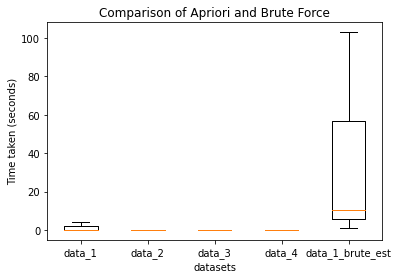

In [36]:
# plot the results with 4 different input sizes (30, 300, 3000)
data_1_time = [0.002, 0.002, 4.01]
data_2_time = [0.00201, 0.00101, 0.00545]
data_3_time = [0.001, 0.002, 0.00954]
data_4_time = [0.00909, 0.00196, 0.00599]
data_1_brute_estimated = [1.01, 10.3, 103]


data = [data_1_time, data_2_time, data_3_time, data_4_time, data_1_brute_estimated]

labels = ['data_1', 'data_2', 'data_3', 'data_4', 'data_1_brute_est']

fig, ax = plt.subplots()
ax.boxplot(data)

ax.set_xlabel('datasets')
ax.set_ylabel('Time taken (seconds)')
ax.set_xticklabels(labels)
ax.set_title('Comparison of Apriori and Brute Force')

plt.show()